In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
#merged_data = pd.read_csv("merged_data.csv")

# Load dataset
file_path = 'dataset.hydro_delta.csv'
df = pd.read_csv(file_path, parse_dates=True)

In [3]:
# Attempt to parse date columns
def parse_dates(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Check if column is object type
            try:
                df[col] = pd.to_datetime(df[col])
                print(f'Parsed {col} as datetime.')
            except ValueError:
                continue  # Skip columns that can't be parsed
    return df

df = parse_dates(df)

Parsed date as datetime.


In [4]:
df.head()



,date,soil_moisture_om,discharge,precipitation_cum,precipitation_mm,discharge_cum,delta_discharge,delta_precipitation
0,2015-06-26,0.266292,6.27,0.0,0.0,6.27,0.00,0.0
1,2015-06-27,0.258583,6.65,22.0,22.0,12.92,6.65,22.0
2,2015-06-28,0.260167,7.15,22.0,0.0,20.07,7.15,0.0
3,2015-06-29,0.254125,6.51,22.0,0.0,26.58,6.51,0.0
4,2015-06-30,0.246417,6.17,22.0,0.0,32.75,6.17,0.0


In [5]:
# Basic Information and Summary Statistics
print("Dataset Information:")
print(df.info())
# print("\nSummary Statistics:")
# print(df.describe())

# Missing Values Analysis
# print("\nMissing Values:")
# print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567 entries, 0 to 3566
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 3567 non-null   datetime64[ns]
 1   soil_moisture_om     3567 non-null   float64       
 2   discharge            3567 non-null   float64       
 3   precipitation_cum    3567 non-null   float64       
 4   precipitation_mm     3567 non-null   float64       
 5   discharge_cum        3567 non-null   float64       
 6   delta_discharge      3567 non-null   float64       
 7   delta_precipitation  3567 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 223.1 KB
None


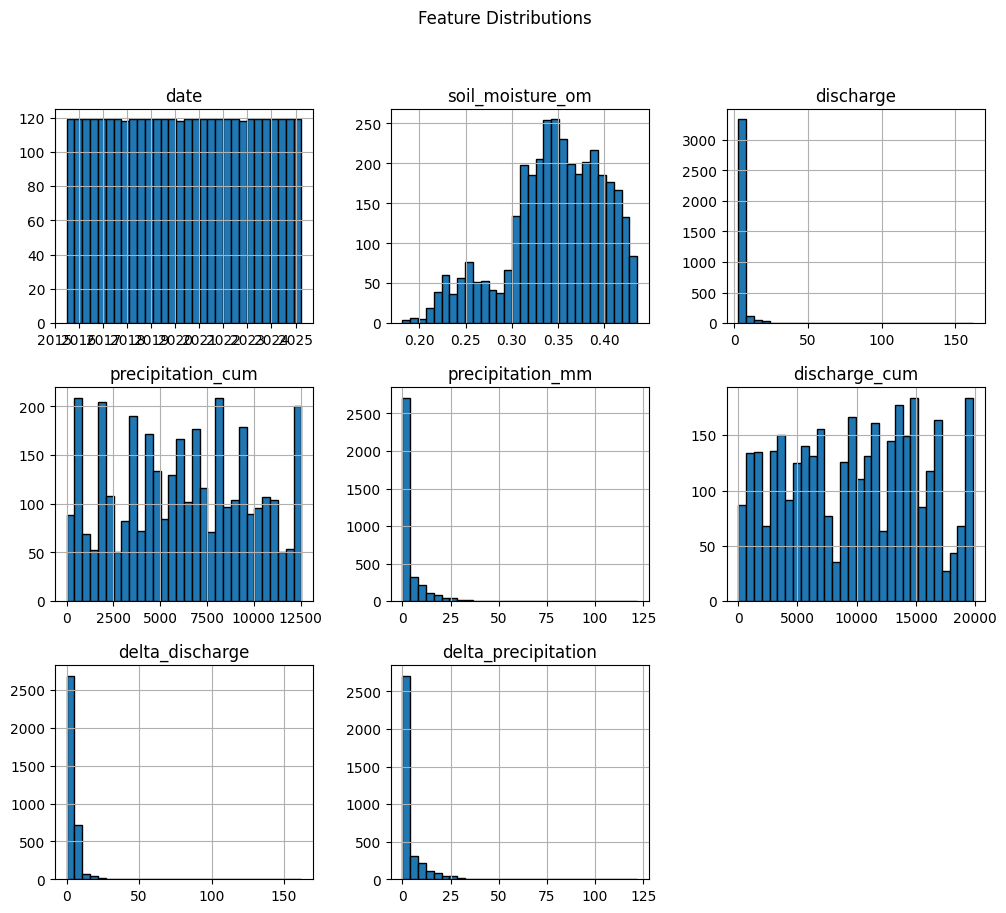

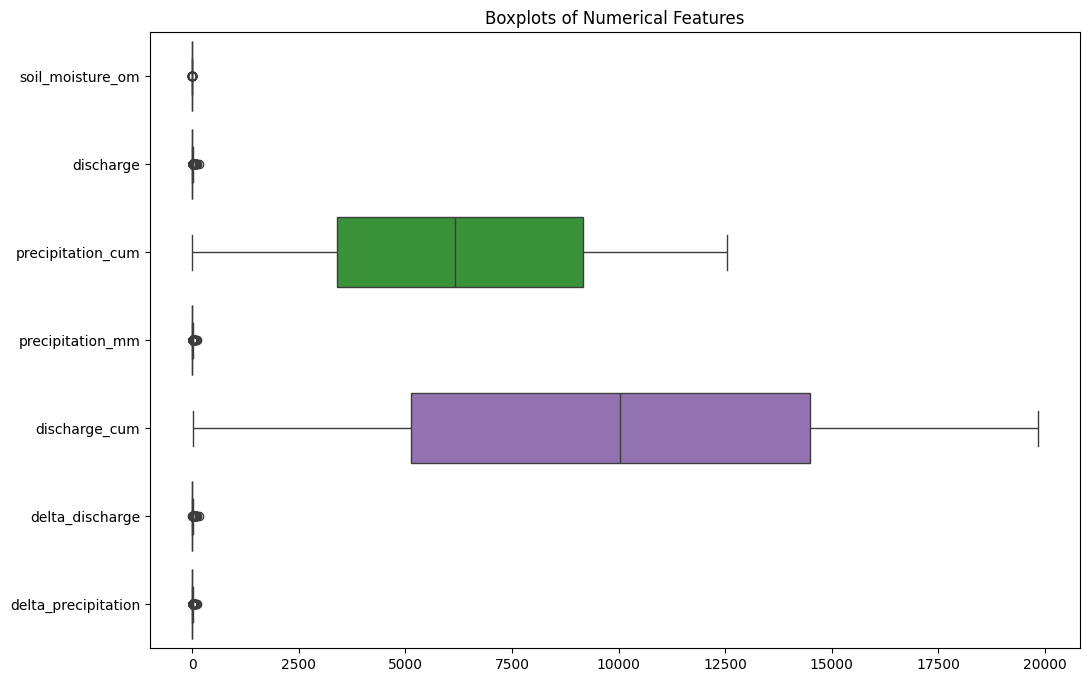

In [12]:
# Univariate Analysis
# Histograms for numerical features
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplots of Numerical Features')
plt.show()

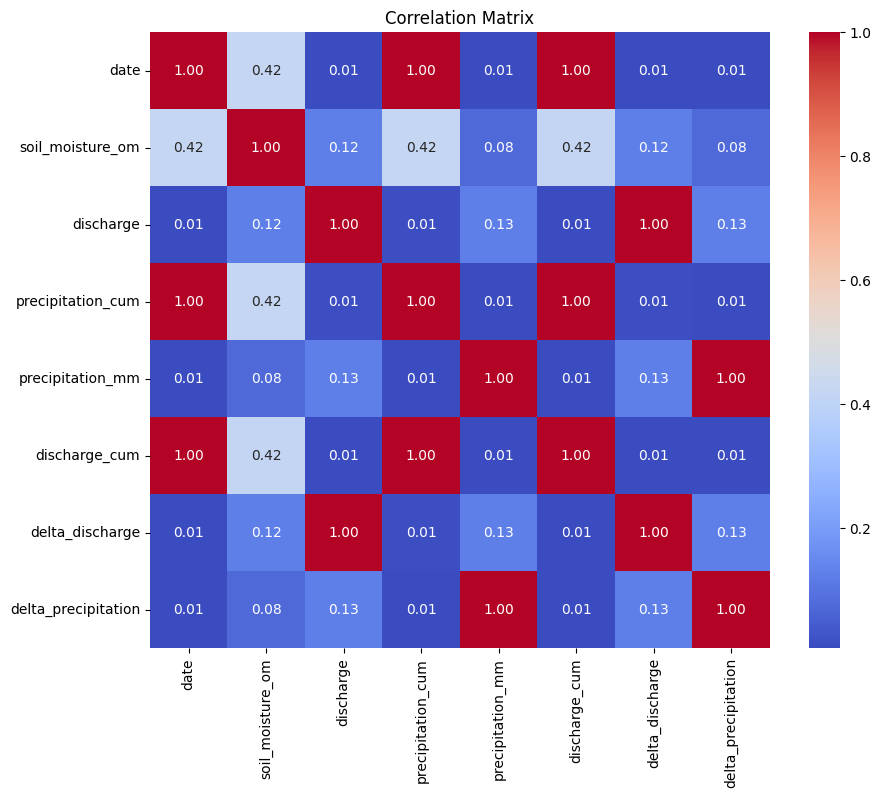

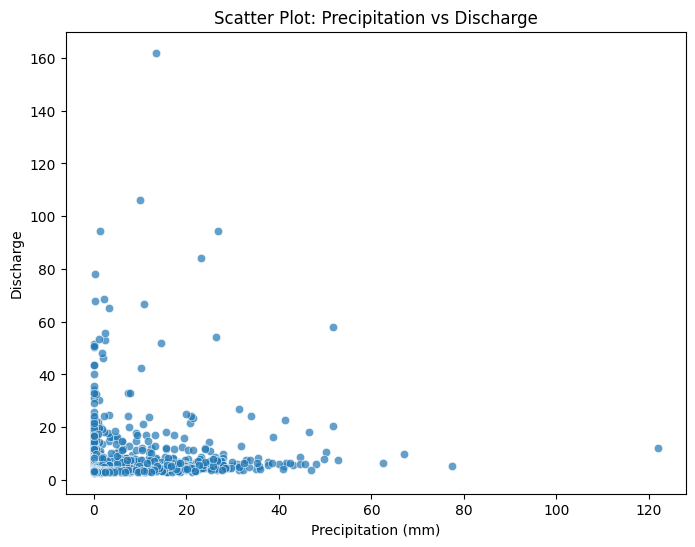

In [13]:
# Bivariate Analysis
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for key relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x='precipitation_mm', y='discharge', data=df, alpha=0.7)
plt.title('Scatter Plot: Precipitation vs Discharge')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Discharge')
plt.show()

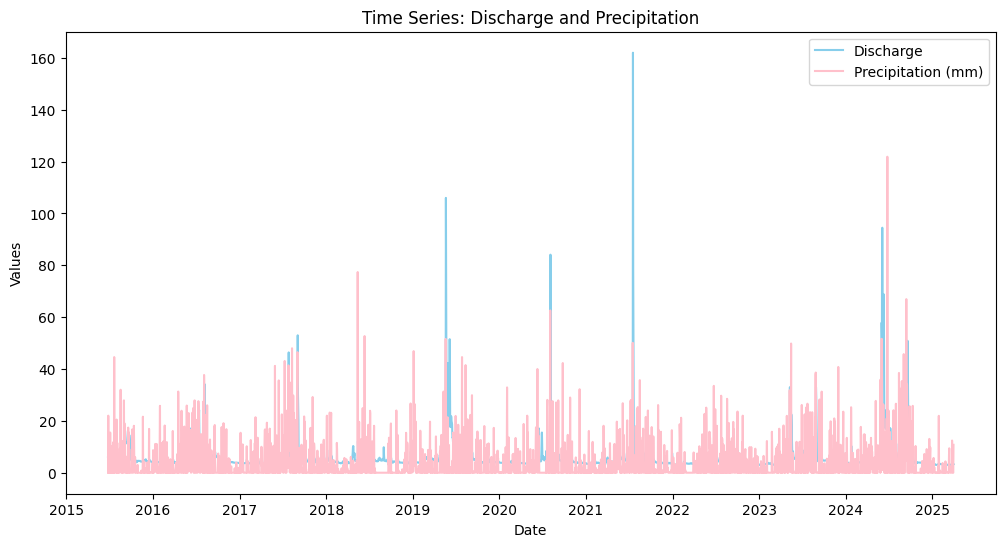

In [ ]:
# Time Series Analysis
# Plot discharge and precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['discharge'], label='Discharge', color='skyblue')
plt.plot(df['date'], df['precipitation_mm'], label='Precipitation (mm)', color='pink')
plt.title('Time Series: Discharge and Precipitation')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


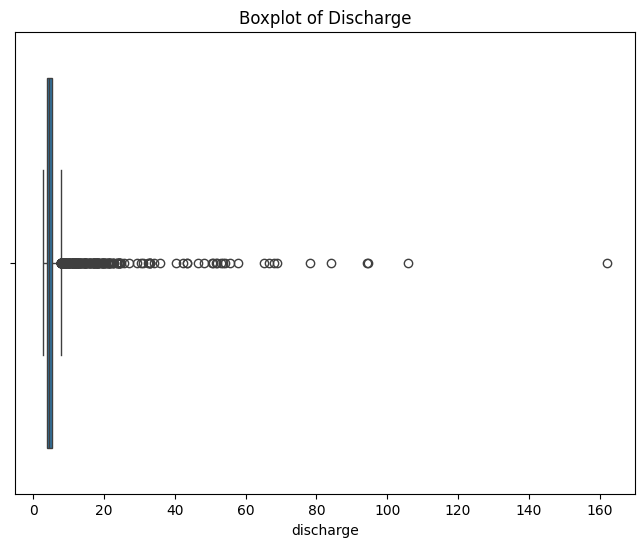

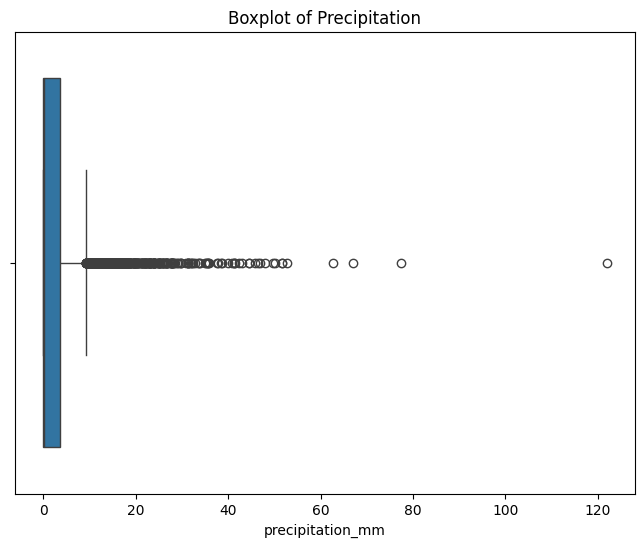

In [22]:
# Outlier Detection
# Boxplot for discharge
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['discharge'])
plt.title('Boxplot of Discharge')
plt.show()

# Boxplot for precipitation
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['precipitation_mm'])
plt.title('Boxplot of Precipitation')
plt.show()

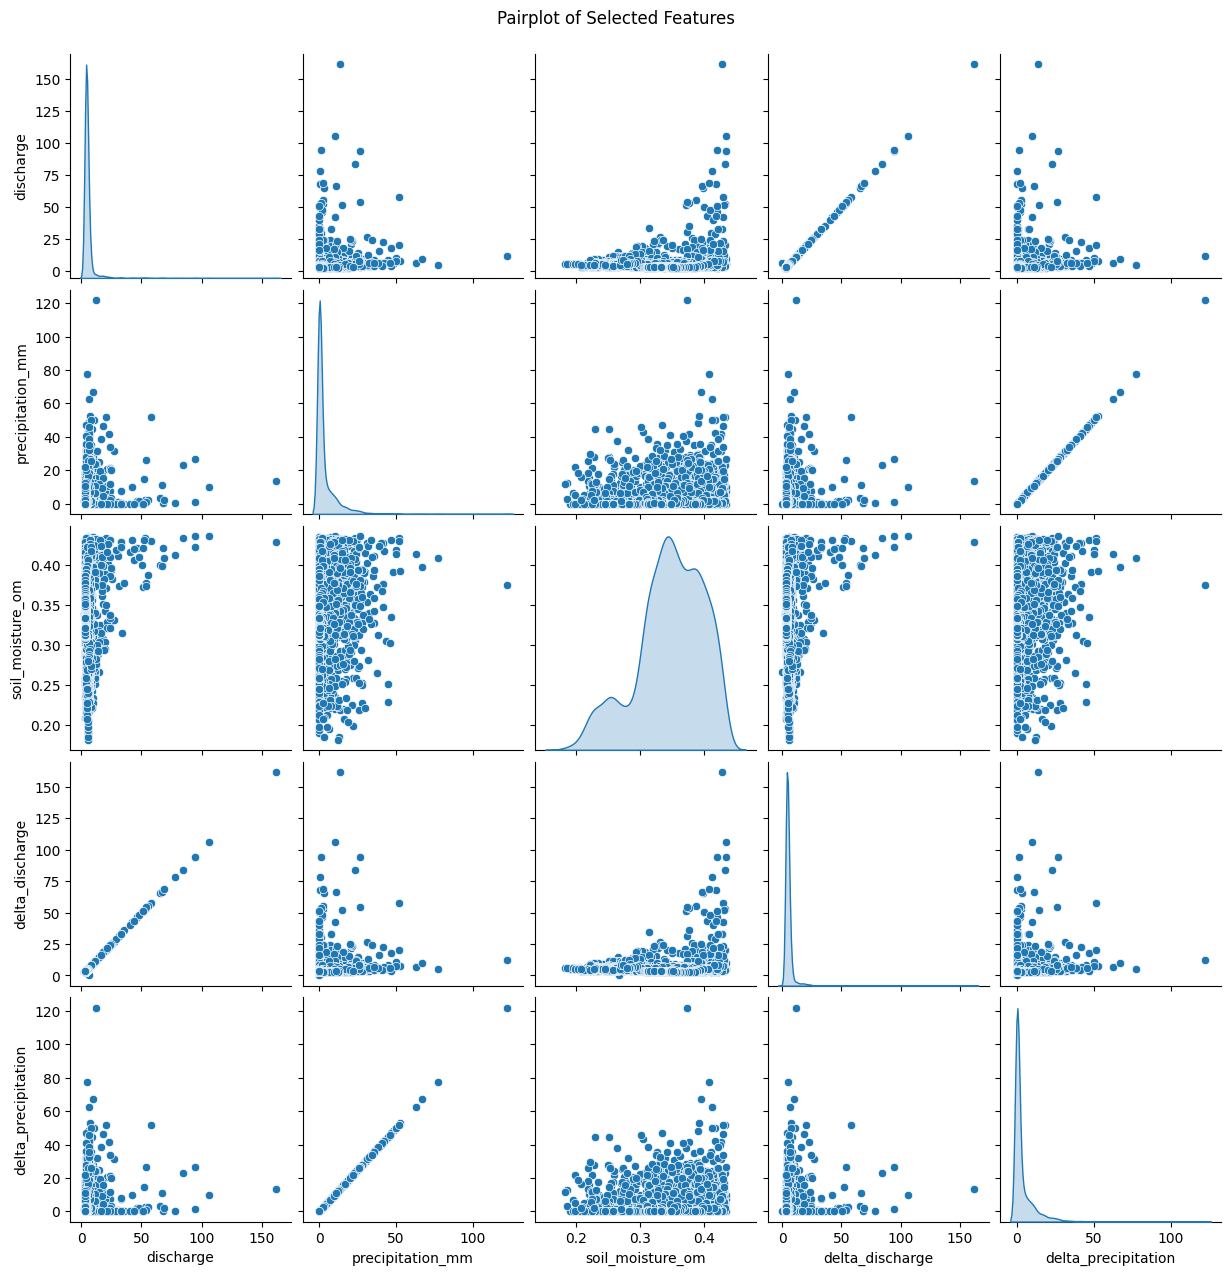

In [24]:
# Feature Relationships
# Pairplot for selected features
selected_features = ['discharge', 'precipitation_mm', 'soil_moisture_om', 'delta_discharge', 'delta_precipitation']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [5]:
# Feature Engineering (Extracting date components)
if any(df.select_dtypes(include=['datetime64']).columns):
    for col in df.select_dtypes(include=['datetime64']).columns:
        df[col+'_year'] = df[col].dt.year
        df[col+'_month'] = df[col].dt.month
        df[col+'_day'] = df[col].dt.day
        df[col+'_dayofweek'] = df[col].dt.dayofweek
        df[col+'_weekofyear'] = df[col].dt.isocalendar().week